In [1]:
import fundamentalanalysis as fa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import statistics as st

%matplotlib inline  

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# api_key = '00ef9804fcde0edd93b1b4821ee2f06a'
api_key = 'c81352430e2fe3c941faf0814227562b'

data

In [4]:

''' Колонки '''
ticker = 'TTWO'
# ticker = 'AAPL'


''' время '''
stime='1990-01-01'
ftime='2023-02-01'
period = '1mo'  # '1d' '1wk'

In [5]:
def get_data_from_ticker(tick, stime, ftime, interval=period):
    ticker = yf.Ticker(tick)

    df = ticker.history(start=stime, end=ftime, interval=interval)
    x = pd.DataFrame(df)
    x.rename(columns={"Close": tick}, inplace=True)
    z = x.drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
    return z

df = get_data_from_ticker(ticker, stime, None, period)
df.tail(3)

,TTWO
Date,
2022-11-01 00:00:00-04:00,105.690002
2022-12-01 00:00:00-05:00,104.129997
2023-01-01 00:00:00-05:00,103.129997


change index

In [6]:
def change_index(df):
    df_index = df.index.to_list()
    for i in range(len(df_index)):
        t = df_index[i].date()
        df_index[i] = t.strftime('%Y-%m-%d')
    df['Date_index'] = df_index
    df = df.set_index('Date_index')
    return df

df = change_index(df)
df.head(3)

,TTWO
Date_index,
1997-05-01,5.249676
1997-06-01,5.582988
1997-07-01,5.457996


In [7]:
# df.loc['1999-01-01']

In [8]:
# df_st_gr = fa.financial_statement_growth(ticker, api_key, period='annual') #quarter 

In [9]:
# df_st_gr

In [10]:
key_metrics = fa.key_metrics(ticker, api_key, period='annual')
df_key_metr = key_metrics.T
df_key_metr.head(3)

,period,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
2022,FY,30.34853,3.619708,2.233918,0.860216,22.099035,32.988345,18.294514,32.988345,2.379209,13801612350,12319783350,33.016474,3.937917,53.497939,138.930285,3.622795,3.622795,3.515117,16.01563,47.75406,124.013845,0.030288,0.007198,0.055463,0.418037,-1.926367,1.839028,19.294968,0.617154,None,0,0.145759,0.116003,0.259221,-0.61493,-0.045264,-0.568015,0.052205,51.833233,0.106635,0.086203,2.223092,1766124000,2112742000,1134528000,0.06568,566097500,98441500,15483000,60.343827,29.925036,3.143648,6.048672,12.197145,116.107154,0.109727,-1.373702
2021,FY,29.430307,5.138532,7.960751,7.359339,23.835326,29.073594,19.058158,29.073594,1.72312,20098898760,18867280760,34.130373,5.959163,22.030584,23.830944,6.032278,6.032278,5.593998,20.578687,20.680597,22.370634,0.029299,0.041962,0.047922,0.447284,-1.343335,1.888614,101.399066,1.549227,None,0,0.115834,0.09408,0.190403,-0.075547,-0.020435,-0.296044,0.032754,57.977587,0.165911,0.120663,4.002483,1985800000,2184103000,1524189000,0.057405,552762000,71001000,17742000,59.819677,16.882039,4.218548,6.101671,21.620611,86.522658,0.176742,-0.601412
2020,FY,27.312814,3.576245,6.062796,5.590772,17.698831,22.452111,15.028931,22.452111,0.246021,13690270800,12357793800,33.848352,4.431986,19.966035,21.651749,5.391475,5.391475,4.00062,17.714245,18.022736,19.544379,0.029544,0.046186,0,0.4869,-1.910035,1.713654,161.269245,1.695297,None,0,0.103023,0.095954,0.169642,-0.077856,-0.017282,-0.225684,0.083484,42.50436,0.146125,0.098425,0.40717,1454812000,1699712000,1083763000,0.009919,572658500,68342500,18425000,70.0177,15.543233,4.521651,5.212968,23.482888,80.722734,0.159283,-0.472024


In [11]:
df_key_metr.index[0]

'2022'

In [12]:
df_key_metr = df_key_metr.loc['2022':'2000'].copy(deep=True)
index_years = df_key_metr.index.to_list()
index_years


['2022',
 '2021',
 '2020',
 '2019',
 '2018',
 '2017',
 '2016',
 '2015',
 '2014',
 '2013',
 '2012',
 '2011',
 '2010',
 '2009',
 '2008',
 '2007',
 '2006',
 '2005',
 '2004',
 '2003',
 '2002',
 '2001',
 '2000']

In [13]:
# financial_ratios = fa.financial_ratios(ticker, api_key, period='annual')
# financial_ratios = financial_ratios.T
# financial_ratios

In [14]:
# df_fin_rat = financial_ratios
# df_fin_rat = df_fin_rat.loc['2022':'2000'].copy(deep=True)
# index_years = df_fin_rat.index.to_list()
# index_years

stock data detailed

In [15]:
# stock_data = fa.stock_data(ticker, period="max", interval="1mo")
# stock_data

In [16]:
# stock_data_det = fa.stock_data_detailed(ticker, api_key)
# stock_data_det

In [17]:
def get_price_from_df(df, list_dates):
    new_list = []
    for i in range(len(list_dates)):
        x = int(list_dates[i])
        x += 1
        x = str(x)
        r = df.loc[f'{x}-01-01']
        r = float(r)
        new_list.append(r)
        
    return new_list
        
stock_year_prices = get_price_from_df(df, index_years)
stock_year_prices

[103.12999725341797,
 163.33999633789062,
 200.4499969482422,
 124.63999938964844,
 105.55000305175781,
 126.66999816894531,
 53.650001525878906,
 34.70000076293945,
 29.719999313354492,
 19.18000030517578,
 12.170000076293945,
 15.600000381469727,
 12.479999542236328,
 9.279999732971191,
 7.019999980926514,
 16.43898582458496,
 17.378925323486328,
 15.859020233154297,
 23.49854850769043,
 19.332138061523438,
 14.125794410705566,
 12.37256908416748,
 8.12449836730957]

In [18]:
df_key_metr[ticker] = list(stock_year_prices)

In [19]:
df_key_metr.drop('period', axis=1, inplace=True)

In [20]:
df_key_metr.tail(3)

,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare,TTWO
2002,13.918415,1.254536,2.541818,2.358349,1.899711,6.248435,4.200543,6.248435,0.001665,1138167544.5,1029893544.5,15.903969,1.433504,7.84954,8.460199,3.193135,3.193135,1.297134,7.460834,7.102812,7.65538,0.062877,0.118201,0,0.276935,-0.784367,2.490977,None,2.026102,None,0,0,0.014514,0.236981,-0.07218,-0.013182,-0.612333,0,13.280623,0.340376,0.190263,1.584315,197453000,239620000,193367000,0.000267,330601500,75330500,46066500,49.851589,58.392142,54.529875,7.321733,6.250841,6.693579,0.200776,-0.183469,14.125794
2001,8.854392,0.117586,0.536282,0.368089,0.118881,4.319877,2.58897,4.319877,1.063416,473389171.2,521505171.2,79.029912,1.049513,17.328203,25.246076,2.151172,2.151172,1.156187,28.090771,19.089468,27.812126,0.012653,0.03961,0,0.380105,2.591759,1.655271,None,4.560768,None,0,0.221968,0.013723,0.248382,-0.313628,-0.018995,-0.579898,0,3.380683,0.117271,0.022449,-0.524111,88229000,131886000,87938000,0.246168,323856000,65612000,39839500,76.834695,71.772703,73.815417,4.750458,5.085499,4.944766,0.02722,-0.168193,12.372569
2000,9.448273,0.609441,-1.34908,-1.420124,0.12805,4.565423,2.355855,4.565423,2.375703,264518812.95,356583812.95,10.596435,0.683501,-4.786891,-4.547419,1.414524,1.414524,0.921391,7.356339,-6.452955,-6.130135,0.094371,-0.219905,0.067465,0.468202,1.899305,1.413655,None,-2.213636,None,0,0.204811,0.014646,0.257379,0.052661,-0.007519,-0.284069,0,7.912205,0.222796,0.095594,-0.873409,62885000,96497000,50269000,0.520369,343819500,59486500,31332000,127.207601,70.787485,66.286905,2.869325,5.156279,5.506367,0.133491,-0.071044,8.124498


In [21]:
def change_percent_all_columns(df):
    x = df.columns.to_list()
    for i in range(len(x)):
        v = df[x[i]].to_list()
        l = []
        for y in range(len(v)):
            try:
                if y != len(v):
                    vv = (v[y] / (v[y+1] / 100)) - 100
                    l.append(vv)
                    # print(vv)
                else:
                    vv = 0
                    l.append(vv)
                    # print(vv)
            except:
                l.append(0)
        df[f'change % {x[i]}'] = l
    return df

df_with_changes = change_percent_all_columns(df_key_metr)

            

In [22]:
df_with_changes.columns.to_list()

['revenuePerShare',
 'netIncomePerShare',
 'operatingCashFlowPerShare',
 'freeCashFlowPerShare',
 'cashPerShare',
 'bookValuePerShare',
 'tangibleBookValuePerShare',
 'shareholdersEquityPerShare',
 'interestDebtPerShare',
 'marketCap',
 'enterpriseValue',
 'peRatio',
 'priceToSalesRatio',
 'pocfratio',
 'pfcfRatio',
 'pbRatio',
 'ptbRatio',
 'evToSales',
 'enterpriseValueOverEBITDA',
 'evToOperatingCashFlow',
 'evToFreeCashFlow',
 'earningsYield',
 'freeCashFlowYield',
 'debtToEquity',
 'debtToAssets',
 'netDebtToEBITDA',
 'currentRatio',
 'interestCoverage',
 'incomeQuality',
 'dividendYield',
 'payoutRatio',
 'salesGeneralAndAdministrativeToRevenue',
 'researchAndDdevelopementToRevenue',
 'intangiblesToTotalAssets',
 'capexToOperatingCashFlow',
 'capexToRevenue',
 'capexToDepreciation',
 'stockBasedCompensationToRevenue',
 'grahamNumber',
 'roic',
 'returnOnTangibleAssets',
 'grahamNetNet',
 'workingCapital',
 'tangibleAssetValue',
 'netCurrentAssetValue',
 'investedCapital',
 'avera

In [23]:
df_with_changes = df_with_changes.reindex(index=df_with_changes.index[::-1])
df_with_changes.head(3)

,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare,TTWO,change % revenuePerShare,change % netIncomePerShare,change % operatingCashFlowPerShare,change % freeCashFlowPerShare,change % cashPerShare,change % bookValuePerShare,change % tangibleBookValuePerShare,change % shareholdersEquityPerShare,change % interestDebtPerShare,change % marketCap,change % enterpriseValue,change % peRatio,change % priceToSalesRatio,change % pocfratio,change % pfcfRatio,change % pbRatio,change % ptbRatio,change % evToSales,change % enterpriseValueOverEBITDA,change % evToOperatingCashFlow,change % evToFreeCashFlow,change % earningsYield,change % freeCashFlowYield,change % debtToEquity,change % debtToAssets,change % netDebtToEBITDA,change % currentRatio,change % interestCoverage,change % incomeQuality,change % dividendYield,change % payoutRatio,change % salesGeneralAndAdministrativeToRevenue,change % researchAndDdevelopementToRevenue,change % intangiblesToTotalAssets,change % capexToOperatingCashFlow,change % capexToRevenue,change % capexToDepreciation,change % stockBasedCompensationToRevenue,change % grahamNumber,change % roic,change % returnOnTangibleAssets,change % grahamNetNet,change % workingCapital,change % tangibleAssetValue,change % netCurrentAssetValue,change % investedCapital,change % averageReceivables,change % averagePayables,change % averageInventory,change % daysSalesOutstanding,change % daysPayablesOutstanding,change % daysOfInventoryOnHand,change % receivablesTurnover,change % payablesTurnover,change % inventoryTurnover,change % roe,change % capexPerShare,change % TTWO
2000,9.448273,0.609441,-1.34908,-1.420124,0.12805,4.565423,2.355855,4.565423,2.375703,264518812.95,356583812.95,10.596435,0.683501,-4.786891,-4.547419,1.414524,1.414524,0.921391,7.356339,-6.452955,-6.130135,0.094371,-0.219905,0.067465,0.468202,1.899305,1.413655,None,-2.213636,None,0,0.204811,0.014646,0.257379,0.052661,-0.007519,-0.284069,0,7.912205,0.222796,0.095594,-0.873409,62885000,96497000,50269000,0.520369,343819500,59486500,31332000,127.207601,70.787485,66.286905,2.869325,5.156279,5.506367,0.133491,-0.071044,8.124498,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2001,8.854392,0.117586,0.536282,0.368089,0.118881,4.319877,2.58897,4.319877,1.063416,473389171.2,521505171.2,79.029912,1.049513,17.328203,25.246076,2.151172,2.151172,1.156187,28.090771,19.089468,27.812126,0.012653,0.03961,0,0.380105,2.591759,1.655271,None,4.560768,None,0,0.221968,0.013723,0.248382,-0.313628,-0.018995,-0.579898,0,3.380683,0.117271,0.022449,-0.524111,88229000,131886000,87938000,0.246168,323856000,65612000,39839500,76.834695,7

Current tests

In [24]:
df_some_columns = df_with_changes[[f'change % {ticker}', 'change % debtToAssets']]
df_some_columns.head(3)

,change % TTWO,change % debtToAssets
2000,0.000000,0.000000
2001,52.287175,-18.816095
2002,14.170261,-27.142362


In [25]:
st.mean(df_some_columns[f'change % {ticker}'].to_list()[1:])

19.80954703329076

Vizualization

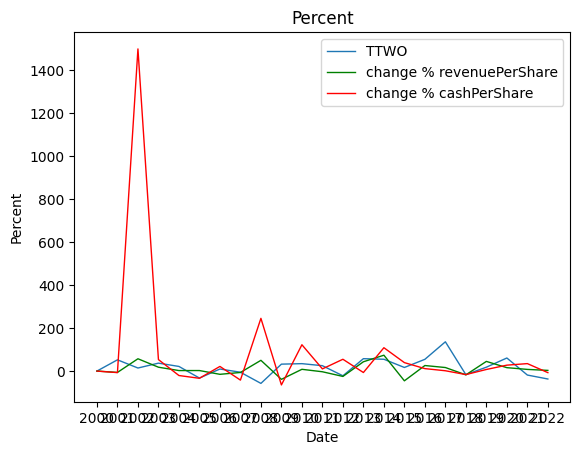

In [26]:
# Set the title and axis labels
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')

x = 'change % revenuePerShare'
y = 'change % cashPerShare'


# Plot close price and moving averages
plt.plot(df_with_changes[f'change % {ticker}'],lw=1, label=ticker)
plt.plot(df_with_changes[x],'g',lw=1, label=x)
plt.plot(df_with_changes[y],'r', lw=1, label=y)

# Add a legend to the axis
plt.legend()

plt.show()

In [27]:
	# change % netDebtToEBITDA	change % currentRatio

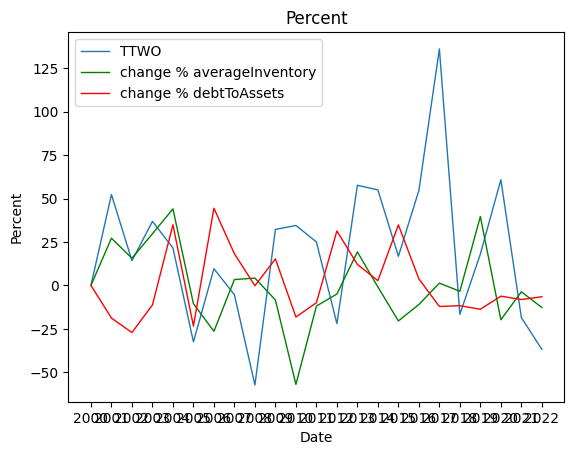

In [28]:
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')


z = 'change % averageInventory'
e = 'change % debtToAssets'

# Plot close price and moving averages
plt.plot(df_with_changes[f'change % {ticker}'],lw=1, label=ticker)
plt.plot(df_with_changes[z],'g',lw=1, label=z)
plt.plot(df_with_changes[e],'r', lw=1, label=e)

# Add a legend to the axis
plt.legend()

plt.show()

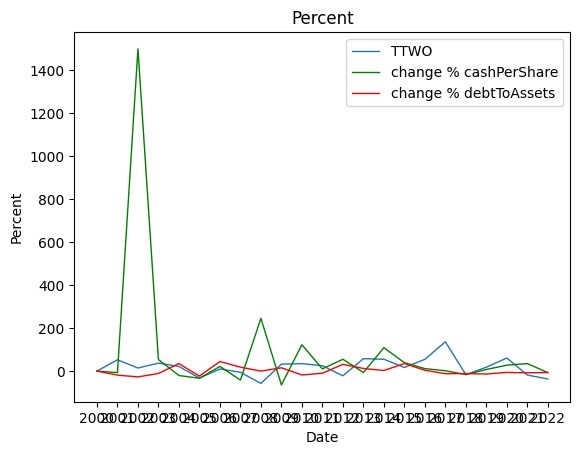

In [29]:
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')


z1 = 'change % cashPerShare'
e1 = 'change % debtToAssets'

# Plot close price and moving averages
plt.plot(df_with_changes[f'change % {ticker}'],lw=1, label=ticker)
plt.plot(df_with_changes[z1],'g',lw=1, label=z1)
plt.plot(df_with_changes[e1],'r', lw=1, label=e1)

# Add a legend to the axis
plt.legend()

plt.show()